In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense,Activation,Input,Flatten,Conv2D,MaxPooling2D,concatenate,LSTM
from tensorflow.keras.activations import relu
from tensorflow.keras.utils import plot_model
import math
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [186]:
import os
os.chdir('c:\\Users\\ASUS\\Projects')
df = pd.read_csv('CI\\Asia_ImportQuantity.csv',encoding='latin-1')
Asia_importQ_Urea = pd.read_csv('Processed_data.csv',index_col='Year')

In [ ]:
df = df.set_index('Year')
#df['Item'].value_counts()
df = df[df['Item']=='Urea']
df = df.drop('Item',axis =1)

<b>First we predict with MLP for Turkey and then use it for other countries</b>

In [44]:
X = df[(df['Area']=='Turkey')]
X = X.drop(['Area'],axis=1)
X

,Value
Year,
2002,648210.55
2003,696935.73
2004,942173.25
2005,808284.41
2006,1104413.38
2007,1291451.42
2008,1210530.11
2009,1411028.57
2010,1285766.23


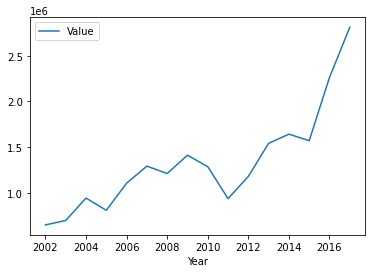

In [45]:
X.plot()

<b>Getting Data Ready for Prediction</b>

In [8]:
len(X)

16

In [258]:
x_train = X.iloc[:10]
X_test = X.iloc[10:]

In [259]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [260]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(X_test)

In [261]:
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY =convertToDataset(x_train_scaled,2)
testX,testY =convertToDataset(x_test_scaled,2)

trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

<b>Define Model</b>

In [262]:
model = Sequential()
model.add(Dense(units=10,activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [263]:
#model.fit_generator(generator,epochs=30)
history = model.fit(trainX,trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
8/8 - 0s - loss: 0.3285
Epoch 2/50
8/8 - 0s - loss: 0.2598
Epoch 3/50
8/8 - 0s - loss: 0.2024
Epoch 4/50
8/8 - 0s - loss: 0.1531
Epoch 5/50
8/8 - 0s - loss: 0.1190
Epoch 6/50
8/8 - 0s - loss: 0.0913
Epoch 7/50
8/8 - 0s - loss: 0.0794
Epoch 8/50
8/8 - 0s - loss: 0.0656
Epoch 9/50
8/8 - 0s - loss: 0.0621
Epoch 10/50
8/8 - 0s - loss: 0.0588
Epoch 11/50
8/8 - 0s - loss: 0.0593
Epoch 12/50
8/8 - 0s - loss: 0.0579
Epoch 13/50
8/8 - 0s - loss: 0.0570
Epoch 14/50
8/8 - 0s - loss: 0.0580
Epoch 15/50
8/8 - 0s - loss: 0.0579
Epoch 16/50
8/8 - 0s - loss: 0.0563
Epoch 17/50
8/8 - 0s - loss: 0.0564
Epoch 18/50
8/8 - 0s - loss: 0.0559
Epoch 19/50
8/8 - 0s - loss: 0.0562
Epoch 20/50
8/8 - 0s - loss: 0.0556
Epoch 21/50
8/8 - 0s - loss: 0.0552
Epoch 22/50
8/8 - 0s - loss: 0.0558
Epoch 23/50
8/8 - 0s - loss: 0.0547
Epoch 24/50
8/8 - 0s - loss: 0.0546
Epoch 25/50
8/8 - 0s - loss: 0.0547
Epoch 26/50
8/8 - 0s - loss: 0.0544
Epoch 27/50
8/8 - 0s - loss: 0.0544
Epoch 28/50
8/8 - 0s - loss: 0.0541
E

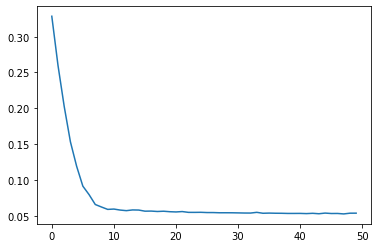

In [264]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [266]:
train_Predictions = model.predict(trainX)
test_predictions= model.predict(testX)
#predicted=np.concatenate((train_Predictions,test_predictions),axis=0)

In [267]:
def convertToOrig(data):
    X=[]
    for i in range(len(data)):
        X.append(data[i][0])
        if(i==len(data)-1):X.append(data[i][1])

    return np.array(X)

In [269]:
true_predictions = scaler.inverse_transform(convertToOrig(test_predictions))

<ipython-input-276-6e3d3774b4eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['pred'] = true_predictions


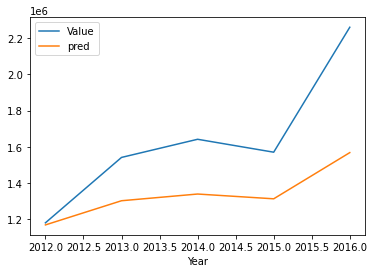

In [276]:
new_test = X_test[:-1]
new_test['pred'] = true_predictions
new_test.plot()

<b> Evaluation </b>

In [277]:
train_score = model.evaluate(trainX,trainY)
test_score = model.evaluate(testX,testY)
print('Test Score is :', test_score,'\n Train Score is :',train_score)

1/1 [==============================] - 0s 27ms/step - loss: 1.2917
Test Score is : 1.2917375564575195 
 Train Score is : 0.052195362746715546


In [278]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(new_test['Value'],new_test['pred']))

373485.61616560514

<b>Repeat Prediction for All Countries</b>

In [326]:
country_dict = {}
i = 0
for (columnName,columnData) in Asia_importQ_Urea.iteritems():
    country_dict[columnName] = i
    i = i+1

In [348]:
def predict_country(country_name):
    x = np.reshape(pd.DataFrame(Asia_importQ_Urea[country_name]),(16,1))
    xTrain = x.iloc[:10]
    xTest = x.iloc[10:]
    MMS = list(np.zeros(35))
    MMS[country_dict[country_name]] = MinMaxScaler()
    MMS[country_dict[country_name]].fit(xTrain)
    train_scaled = MMS[country_dict[country_name]].transform(xTrain)
    test_scaled = MMS[country_dict[country_name]].transform(xTest)

    trainX,trainY =convertToDataset(train_scaled,2)
    testX,testY =convertToDataset(test_scaled,2)

    trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
    testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

    mlp = list(np.zeros(35))
    mlp[country_dict[country_name]] = Sequential()
    mlp[country_dict[country_name]].add(Dense(units=10,activation='relu'))
    mlp[country_dict[country_name]].add(Dense(20, activation='relu'))
    mlp[country_dict[country_name]].add(Dense(5, activation='relu'))
    mlp[country_dict[country_name]].add(Dense(1))
    mlp[country_dict[country_name]].compile(optimizer='adam', loss='mse')

    history = []
    history.append(mlp[country_dict[country_name]].fit(trainX,trainY, epochs=50, batch_size=1, verbose=2))

    test_predictions= mlp[country_dict[country_name]].predict(testX)

    true_predictions = MMS[country_dict[country_name]].inverse_transform(convertToOrig(test_predictions))
    new_test = xTest[:-1]
    new_test['pred'] = true_predictions
    new_test.plot()

    train_score = mlp[country_dict[country_name]].evaluate(trainX,trainY)
    test_score = mlp[country_dict[country_name]].evaluate(testX,testY)
    print('Test Score is :', test_score,'\n Train Score is :',train_score)

    from sklearn.metrics import mean_squared_error
    print('\n MSE : ',np.sqrt(mean_squared_error(new_test[country_name],new_test['pred'])))

Epoch 1/50
8/8 - 1s - loss: 0.3702
Epoch 2/50
8/8 - 0s - loss: 0.3418
Epoch 3/50
8/8 - 0s - loss: 0.3134
Epoch 4/50
8/8 - 0s - loss: 0.2789
Epoch 5/50
8/8 - 0s - loss: 0.2348
Epoch 6/50
8/8 - 0s - loss: 0.2007
Epoch 7/50
8/8 - 0s - loss: 0.1661
Epoch 8/50
8/8 - 0s - loss: 0.1398
Epoch 9/50
8/8 - 0s - loss: 0.1202
Epoch 10/50
8/8 - 0s - loss: 0.1103
Epoch 11/50
8/8 - 0s - loss: 0.1026
Epoch 12/50
8/8 - 0s - loss: 0.0975
Epoch 13/50
8/8 - 0s - loss: 0.0948
Epoch 14/50
8/8 - 0s - loss: 0.0956
Epoch 15/50
8/8 - 0s - loss: 0.0946
Epoch 16/50
8/8 - 0s - loss: 0.0962
Epoch 17/50
8/8 - 0s - loss: 0.0932
Epoch 18/50
8/8 - 0s - loss: 0.0922
Epoch 19/50
8/8 - 0s - loss: 0.0920
Epoch 20/50
8/8 - 0s - loss: 0.0910
Epoch 21/50
8/8 - 0s - loss: 0.0929
Epoch 22/50
8/8 - 0s - loss: 0.0905
Epoch 23/50
8/8 - 0s - loss: 0.0905
Epoch 24/50
8/8 - 0s - loss: 0.0882
Epoch 25/50
8/8 - 0s - loss: 0.0883
Epoch 26/50
8/8 - 0s - loss: 0.0883
Epoch 27/50
8/8 - 0s - loss: 0.0882
Epoch 28/50
8/8 - 0s - loss: 0.0880
E

<ipython-input-348-ae21477278f5>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['pred'] = true_predictions


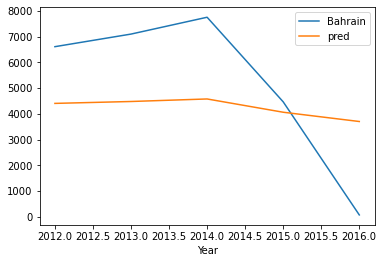

In [351]:
predict_country('Bahrain')